In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [6]:
# snrs = [10, 20, 30, 40]
# mtots = [10, 20, 30, 40, 50, 60, 70, 80]

# for snr in snrs:
#     for mtot in mtots:
#         print(f"python calc_bias_lambda_grid.py -p 0 -i ../data/mtot_q_grids_xas_vs_d/mtot_{mtot}_grid_SNR_{snr} -o ../output/mtot_q_lam_grids_xas_vs_d/mtot_{mtot}_SNR_{snr}_Mc_lam_grid.csv --minlambda 1e-5 --maxlambda 1e0 --nlambda 20")
#     print()

In [2]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)
import matplotlib.colors as colors


In [4]:
# plotdir = 'mtot_q_grid_plots_xas_vs_d_snr/'

In [3]:
mtots = [10, 20, 30, 40, 50, 60, 70, 80]
snrs = [10, 20, 30, 40, 100, 200, 300]
Mc_files = ['mtot_q_lam_grids_xas_vs_d/mtot_'+str(mtot)+f'_SNR_{snr}_Mc_lam_grid.csv' for mtot in mtots for snr in snrs]


df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]

In [4]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]



print("Total number of events:",len(df))


df

Total number of events: 560


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,DL_stat_err,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
0,0.623468,0.009803,2956.807791,0.505315,9.900990,0.099010,10.0,100.000000,10.0,748.741040,...,0.130591,0.061765,0.036637,0.054741,0.067545,0.066371,0.053622,0.036166,0.031980,0.051414
1,0.840292,0.016121,3795.302067,0.621641,9.836107,0.163893,10.0,60.015407,10.0,963.167915,...,0.211665,0.131236,0.079334,0.073969,0.093626,0.108372,0.109766,0.096858,0.071070,0.035007
2,1.126712,0.026284,4852.872507,0.760635,9.729865,0.270135,10.0,36.018491,10.0,1231.127596,...,0.563591,0.491733,0.420130,0.350408,0.284352,0.224108,0.172610,0.134272,0.114559,0.114799
3,1.498163,0.042260,6165.590715,0.924495,9.557848,0.442152,10.0,21.616644,10.0,1564.483327,...,0.867089,0.840870,0.812806,0.783063,0.751818,0.719253,0.685562,0.650943,0.615601,0.579748
4,1.965492,0.066443,7752.003122,1.113324,9.284350,0.715650,10.0,12.973317,10.0,1965.879305,...,0.963649,0.956212,0.948142,0.939458,0.930179,0.920328,0.909924,0.898992,0.887553,0.875631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,20.198982,0.100863,1481.863676,0.280228,70.894594,9.105406,80.0,7.785989,300.0,12.480869,...,0.936908,0.925891,0.914603,0.903199,0.891822,0.880602,0.869654,0.859068,0.848917,0.839247
6,25.135041,0.145205,1840.527864,0.338152,65.897599,14.102401,80.0,4.672793,300.0,15.450092,...,0.894871,0.878489,0.862422,0.846966,0.832362,0.818787,0.806342,0.795056,0.784885,0.775726
7,29.884827,0.193762,2206.725109,0.394919,58.971693,21.028307,80.0,2.804396,300.0,18.529955,...,0.863613,0.844145,0.825738,0.808776,0.793525,0.780115,0.768538,0.758657,0.750229,0.742934
8,33.449753,0.233797,2497.891072,0.438616,50.183404,29.816596,80.0,1.683069,300.0,21.040639,...,0.848110,0.827548,0.808577,0.791618,0.776928,0.764573,0.754443,0.746264,0.739641,0.734103


In [14]:
mask = (np.abs(df["Mc"]-35.0)<1) * (df["q"] < 1.1) * (df["snr"]==10)
print(df[mask])
print(bias_lams[mask])
print(sig_bias_lams[mask])
print(lams)

          Mc       eta            DL         z         m1         m2  M_tot  \
9  34.821495  0.249994  78403.869284  7.677989  40.201005  39.798995   80.0   

          q   snr   DL_stat_err  ...  inner_10  inner_11  inner_12  inner_13  \
9  1.010101  10.0  19626.916084  ...  0.827837  0.806818  0.788345   0.77282   

   inner_14  inner_15  inner_16  inner_17  inner_18  inner_19  
9  0.760369  0.750845  0.743852  0.738807  0.735014  0.731749  

[1 rows x 75 columns]
     bias_0    bias_1    bias_2    bias_3    bias_4    bias_5    bias_6  \
9  0.000009  0.047061  0.084348  0.103752  0.102178  0.082558  0.053051   

     bias_7   bias_8    bias_9   bias_10   bias_11   bias_12   bias_13  \
9  0.024637  0.00778  0.009117  0.029175  0.061822  0.095692  0.117259   

   bias_14   bias_15   bias_16   bias_17   bias_18   bias_19  
9  0.11476  0.081851  0.019978  0.061319  0.146322  0.216877  
     bias_0    bias_1    bias_2    bias_3    bias_4    bias_5    bias_6  \
9  0.000094  0.480755  0.861

In [6]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["Mc"], axis='rows')

sig_bias_lams = df[bias_colnames].div(df["Mc_stat_err"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

# rel_bias_lams

In [144]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, etamin=None, qmax=None, snr=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"

    if etamin is not None:
        mask = mask * (df["eta"] > etamin) 
        # title = title + " ($\eta$ > " + str(np.round(etamin,2)) + ")"

    if snr is not None:
        mask = mask* (df["snr"]< 1.1*snr) * (df["snr"]> 0.9*snr)
        title = title + " (SNR = " + str(np.round(snr,1)) + ")"
        
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf', dpi=300)
    if plt_show:
        plt.show()


# Overall Population

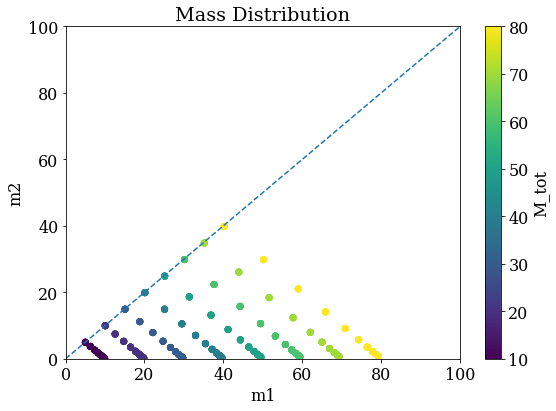

In [36]:
# Mass Distribution
plot_bias_features(df["m1"], df["m2"], df["M_tot"], colormap="viridis", mtot=None,\
    title="Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False)
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


No handles with labels found to put in legend.


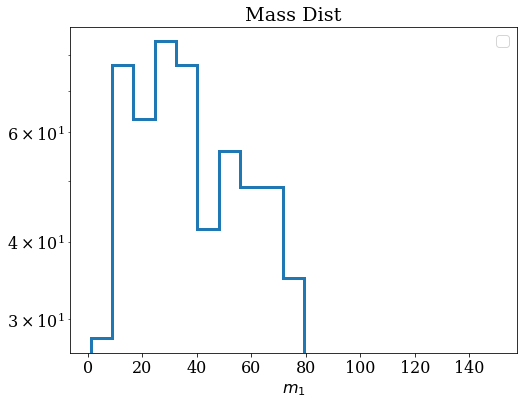

In [37]:
# Mass Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(1, 150, 20)
x = np.linspace(5, 150, 100)
plt.hist(df["m1"], bins, histtype='step', lw=3)
# plt.plot(x, 2000000*x**(-3.5), linestyle='--', label='$p(m_1) \propto m_1^{-3.5}$')

plt.semilogy()

plt.xlabel("$m_1$")
plt.ylabel("")
plt.title("Mass Dist")
plt.legend()

# plt.savefig(plotdir+"powerlaw_m1_dist.pdf")
plt.show()

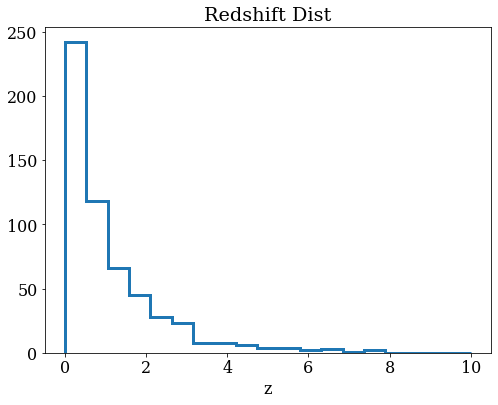

In [38]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 10, 20)

plt.hist(df["z"], bins, histtype='step', lw=3)

plt.xlabel("z")
plt.ylabel("")
plt.title("Redshift Dist")
plt.show()

In [162]:
df["z"].iloc[0]

0.0218799394948757

# Bias Stuff

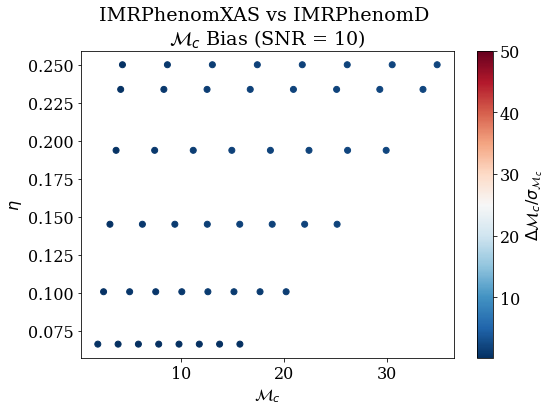

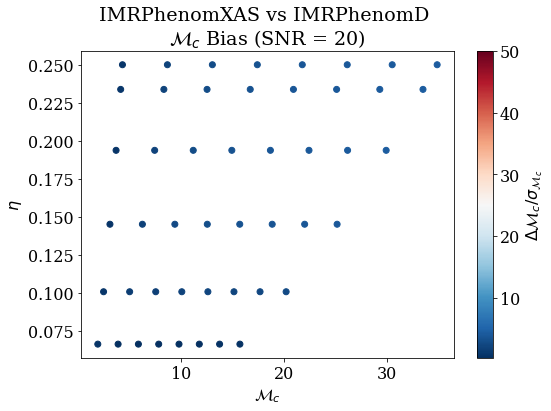

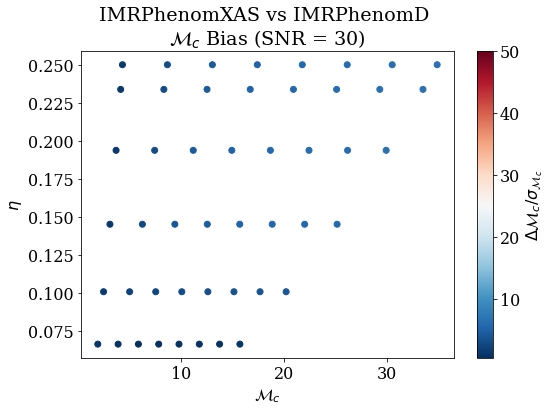

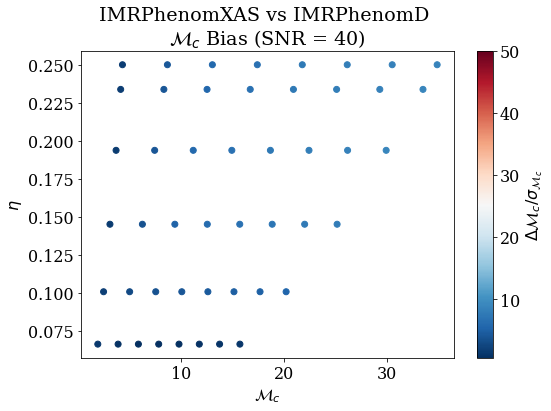

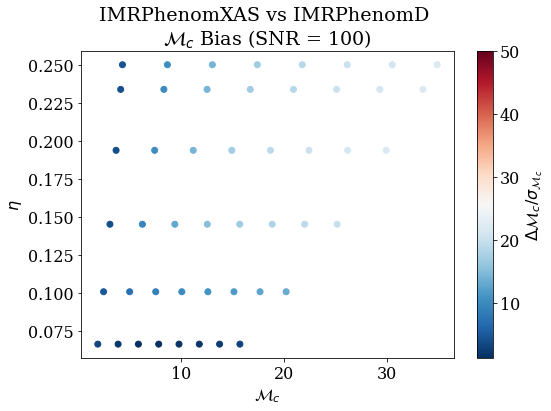

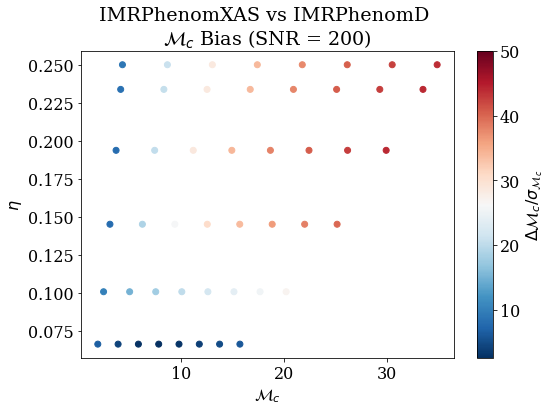

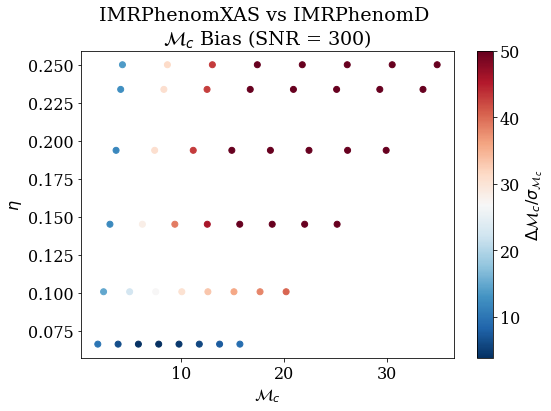

In [145]:
for SNR in snrs:
    plot_bias_features(df["Mc"], df["eta"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), snr=SNR, etamin=0.05, colormap="RdBu_r", vmax=50.0,\
        title="IMRPhenomXAS vs IMRPhenomD \n$\mathcal{M}_{c}$ Bias", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", 
        cbar_label="$\Delta {\mathcal{M}_{c}} / \sigma_{\mathcal{M}_{c}}$")#, savefig=f'animation/mc_bias_snr_{SNR:.0f}') 


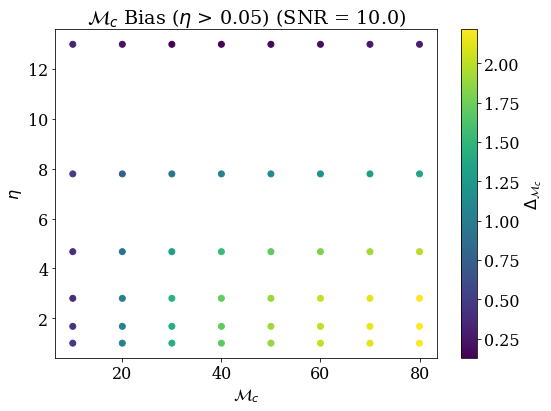

In [108]:
plot_bias_features(df["M_tot"], df["q"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]),  etamin=0.05, snr=10.0, colormap="viridis",\
    title="$\mathcal{M}_{c}$ Bias", xlabel="$\mathcal{M}_{c}$", ylabel="$\eta$", cbar_label="$\Delta_{\mathcal{M}_{c}}$")

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## Mc biases over lambda grid

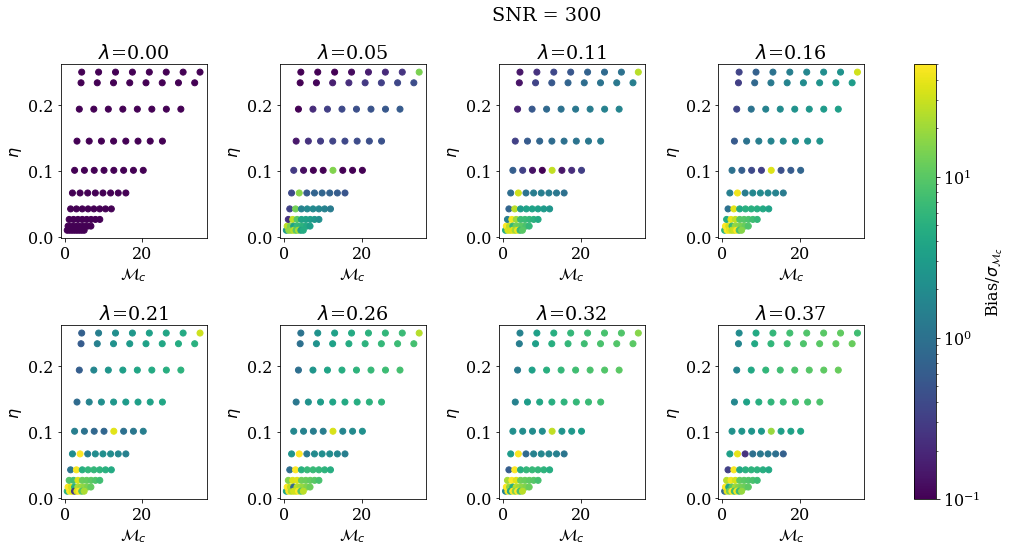

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
lams_range = lams[:]

for i in range(len(axes.flat)):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    
    lam_i = i
    c = df[f"bias_{lam_i}"]/df["Mc_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=50))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$\mathcal{M}_{c}$")
    ax.set_title(f"$\lambda$={lams_range[lam_i]:.2f}")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)


cbar = fig.colorbar(sc, ax=axes.ravel().tolist())
cbar.set_label("Bias/$\sigma_{\mathcal{M}_{c}}$")

plt.suptitle(f"SNR = {SNR}")
# plt.savefig(plotdir+f'bias_sig_vs_lambda_grid_snr_{SNR}.pdf', bbox='tight')
plt.show()
    

# Average Bias vs Lambda

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


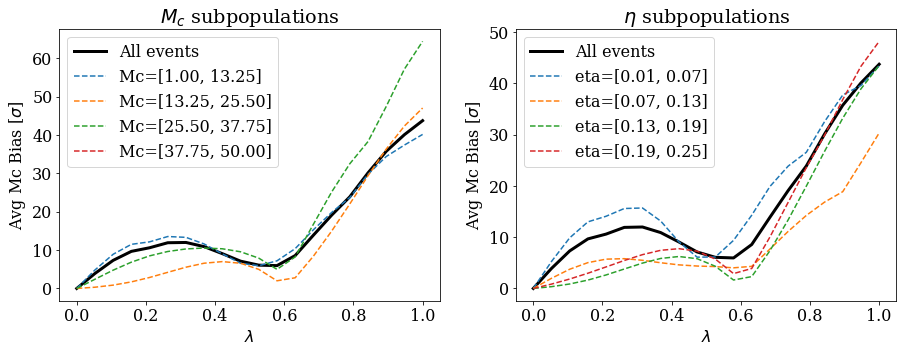

In [184]:
mc_brackets = np.linspace(1, 50, 5)
eta_brackets = np.linspace(0.01, 0.25, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[0].plot(lams, avg_bias, 'k', lw=3, label="All events")

for mc_index in range(1, len(mc_brackets)):
    avg_bias = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])
    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[mc_mask] / df["Mc_stat_err"][mc_mask]
        avg_bias[i] = np.average(bias)  
    axes[0].plot(lams, avg_bias, linestyle='--', label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

axes[0].set_xlabel("$\lambda$")
axes[0].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[0].legend()
axes[0].set_title("$M_c$ subpopulations")

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[1].plot(lams, avg_bias, 'k', lw=3, label="All events")

for eta_index in range(1, len(eta_brackets)):
    avg_bias = np.zeros(n_lams)
    eta_mask = (df["eta"] < eta_brackets[eta_index]) * (df["eta"] > eta_brackets[eta_index-1])

    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    axes[1].plot(lams, avg_bias, linestyle='--', label=f'eta=[{eta_brackets[eta_index-1]:.2f}, {eta_brackets[eta_index]:.2f}]')

axes[1].set_xlabel("$\lambda$")
axes[1].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[1].legend()
axes[1].set_title("$\eta$ subpopulations")

plt.show()

The average bias is not monotonic over the entire lambda range. However, if we limit ourselves to small deviations from IMRPhenomXAS ($\lambda$ ~ 0.0), then things look better.

The average bias in Mc already reaches ~ 10 $\sigma$ for $\lambda$ ~ 0.3.

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


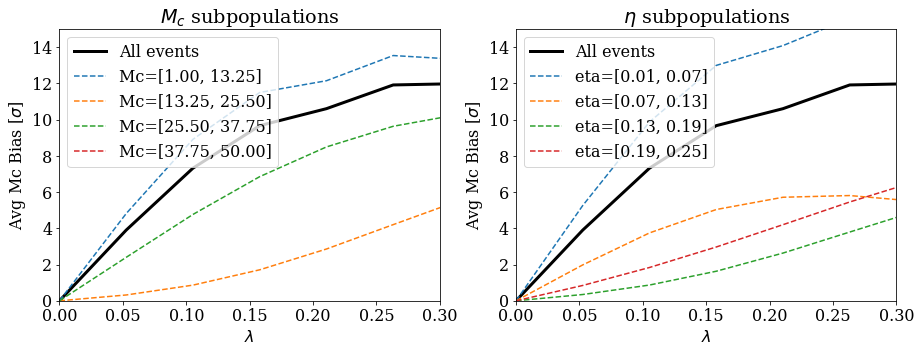

In [185]:
mc_brackets = np.linspace(1, 50, 5)
eta_brackets = np.linspace(0.01, 0.25, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[0].plot(lams, avg_bias, 'k', lw=3, label="All events")

for mc_index in range(1, len(mc_brackets)):
    avg_bias = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])
    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[mc_mask] / df["Mc_stat_err"][mc_mask]
        avg_bias[i] = np.average(bias)  
    axes[0].plot(lams, avg_bias, linestyle='--', label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

axes[0].set_xlabel("$\lambda$")
axes[0].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[0].legend()
axes[0].set_title("$M_c$ subpopulations")
axes[0].set_xlim(0, 0.3)
axes[0].set_ylim(0, 15)

avg_bias = np.zeros(n_lams)
for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values / df["Mc_stat_err"]
        avg_bias[i] = np.average(bias)
axes[1].plot(lams, avg_bias, 'k', lw=3, label="All events")

for eta_index in range(1, len(eta_brackets)):
    avg_bias = np.zeros(n_lams)
    eta_mask = (df["eta"] < eta_brackets[eta_index]) * (df["eta"] > eta_brackets[eta_index-1])

    for i in range(n_lams):
        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    axes[1].plot(lams, avg_bias, linestyle='--', label=f'eta=[{eta_brackets[eta_index-1]:.2f}, {eta_brackets[eta_index]:.2f}]')

axes[1].set_xlabel("$\lambda$")
axes[1].set_ylabel("Avg Mc Bias [$\sigma$]")
axes[1].legend()
axes[1].set_title("$\eta$ subpopulations")
axes[1].set_xlim(0, 0.3)
axes[1].set_ylim(0, 15)

# plt.savefig(plotdir + 'bias_vs_lambda_0_03.pdf')
plt.show()

# Average Fathfulness vs lambda

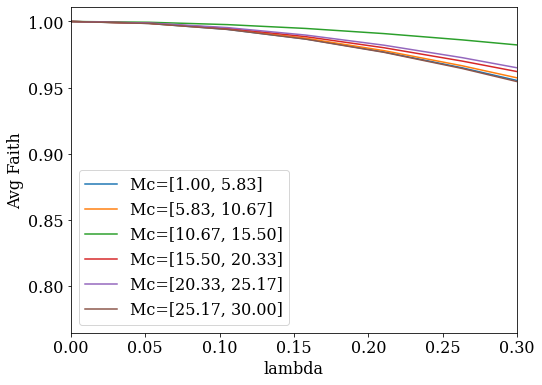

In [16]:
mc_brackets = np.linspace(1, 30, 7)

fig, ax = plt.subplots(figsize=(8, 6))

for mc_index in range(1, len(mc_brackets)):
    avg_faith = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mc_mask]
        avg_faith[i] = np.average(faith)
    
    plt.plot(lams, avg_faith, label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

plt.xlabel("lambda")
plt.ylabel("Avg Faith")
plt.xlim(0, 0.3)
plt.legend()
plt.show()

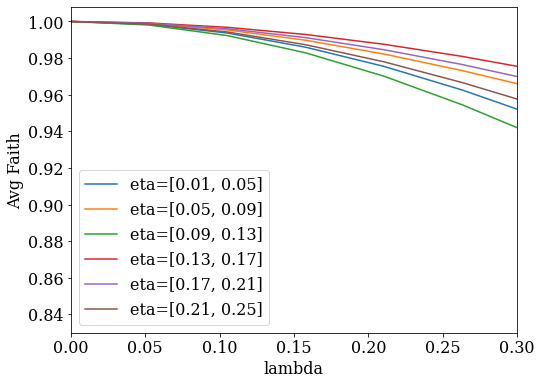

In [17]:
eta_brackets = np.linspace(0.01, 0.25, 7)

fig, ax = plt.subplots(figsize=(8, 6))

for index in range(1, len(eta_brackets)):
    avg_faith = np.zeros(n_lams)
    mask = (df["eta"] < eta_brackets[index]) * (df["eta"] > eta_brackets[index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mask]
        avg_faith[i] = np.average(faith)
    
    plt.plot(lams, avg_faith, label=f'eta=[{eta_brackets[index-1]:.2f}, {eta_brackets[index]:.2f}]')

plt.xlabel("lambda")
plt.ylabel("Avg Faith")
plt.xlim(0,0.3)
plt.legend()
plt.show()

# Average Faithfulness vs Avg Bias

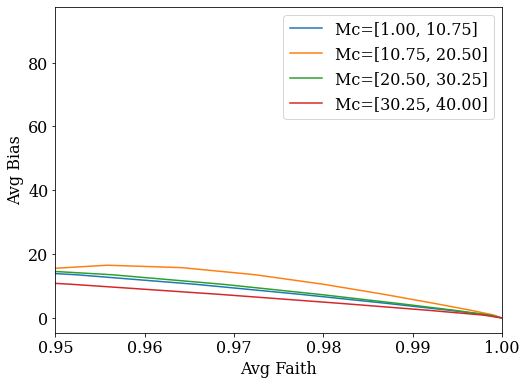

In [18]:
mc_brackets = np.linspace(1, 40, 5)

fig, ax = plt.subplots(figsize=(8, 6))

for mc_index in range(1, len(mc_brackets)):
    avg_faith = np.zeros(n_lams)
    mc_mask = (df["Mc"] < mc_brackets[mc_index]) * (df["Mc"] > mc_brackets[mc_index-1])

    for i in range(n_lams):
        faith = inner_prod_lams.iloc[:,i].values[mc_mask]
        avg_faith[i] = np.average(faith)

        bias = bias_lams.iloc[:,i].values[eta_mask] / df["Mc_stat_err"][eta_mask]
        avg_bias[i] = np.average(bias)
    
    plt.plot(avg_faith, avg_bias, label=f'Mc=[{mc_brackets[mc_index-1]:.2f}, {mc_brackets[mc_index]:.2f}]')

plt.xlabel("Avg Faith")
plt.ylabel("Avg Bias")
plt.xlim(0.95, 1)
plt.legend()
plt.show()

## fraction of unbiased events vs lambda

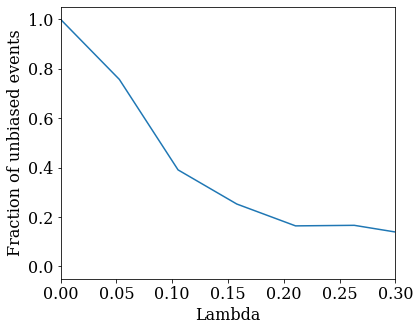

In [19]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["Mc_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("Lambda")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0, 0.3)
plt.show()

# SNR at which events become biased

In [94]:
# mcs = np.unique(df["Mc"])
# etas = np.unique(df["eta"])

qs = 1/np.geomspace(0.01, 0.99, 10)

snr_for_bias = np.zeros((len(mtots), len(qs)))

for i, mtot in enumerate(mtots[:]):
    for j, q in enumerate(qs[:]):
        mtot_q_mask = ((df["M_tot"] > 0.9*mtot) * (df["M_tot"] < 1.1*mtot) * (df["q"] > 0.9*q) * (df["q"] < 1.1*q))
        data_subset = df[mtot_q_mask]

        bias_set = np.abs(data_subset["Mc_full_bias"] / data_subset["Mc_stat_err"])
        snr_set = data_subset["snr"]

        bias_exceed_index = np.where(bias_set>1.0)[0][0]
        snr_for_bias[i,j] = np.array(snr_set)[bias_exceed_index]


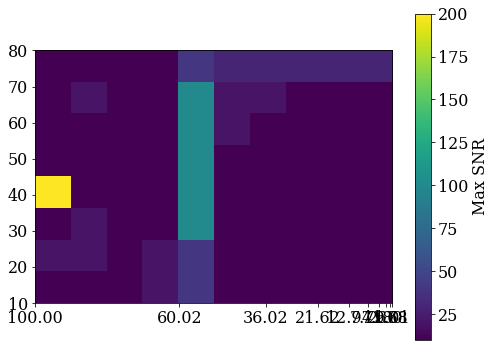

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))
im = plt.imshow(snr_for_bias, extent=[qs[0], qs[-1], mtots[0], mtots[-1]])
ax.set_xticks(qs)
ax.set_yticks(mtots)
cbar = plt.colorbar(im)
cbar.set_label("Max SNR")
plt.show()